<a href="https://colab.research.google.com/github/raudhrafn/AI-ML-Projects/blob/main/coffee_coupon_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('drive/MyDrive/Assignment 5.1/data/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [9]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684,12684,12684,12684,12684
mean,63.3018,0.414144,1,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.1545,0.492593,0,0.496224,0.32395,0.410671,0.410671,0.495314
min,30,0,1,0,0,0,0,0
25%,55,0,1,0,0,0,1,0
50%,80,0,1,1,0,0,1,1
75%,80,1,1,1,0,0,1,1
max,80,1,1,1,1,1,1,1


In [6]:
missing_vals = data.isnull().sum()
missing_vals

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [28]:
cars = data['car'].unique()
cars

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [29]:
bars = data['Bar'].unique()
bars

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [30]:
coffee_houses = data['CoffeeHouse'].unique()
coffee_houses

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

In [31]:
carry_aways = data['CarryAway'].unique()
carry_aways

array([nan, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [32]:
restaurants_less_20 = data['RestaurantLessThan20'].unique()
restaurants_less_20

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [33]:
restaurants_20_50 = data['Restaurant20To50'].unique()
restaurants_20_50

array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

The *car* column is all but completely null, making it less likely to be useful in analysis. The other columns containing nulls have only a few by comparison, so imputing with the mode may be a viable solution.

In [38]:
data['car'] = data['car'].fillna(data['car'].mode()[0])
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])

In [39]:
missing_vals = data.isnull().sum()
missing_vals

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


4. What proportion of the total observations chose to accept the coupon?



In [40]:
use_pct = data['Y'].value_counts(normalize=True)
use_pct

,proportion
Y,
1,0.568433
0,0.431567


Approx. **56.8%** of total observations chose to accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

<ipython-input-58-29b1de4d8931>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  coupons.set_xticklabels(coupons.get_xticklabels(), rotation=45, ha='right')


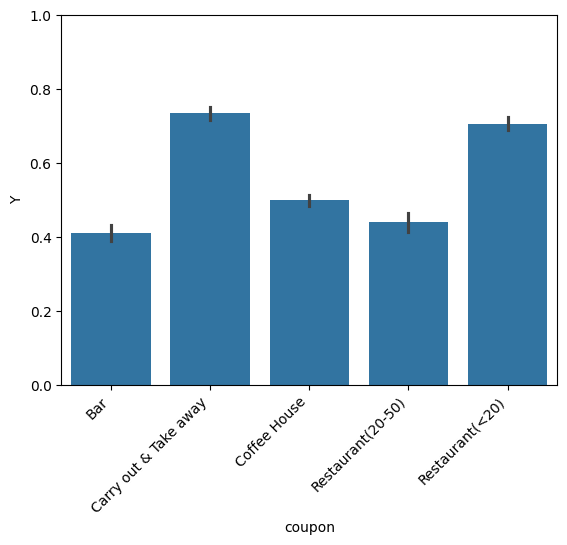

In [58]:
coupons = sns.barplot(data=data, x='coupon', y='Y', order=data.sort_values('coupon').coupon.unique())
coupons.set_xticklabels(coupons.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0,1)
plt.show()

Seems like people were more likely to accept if it was a quick stop or cheaper restaurant.

6. Use a histogram to visualize the temperature column.

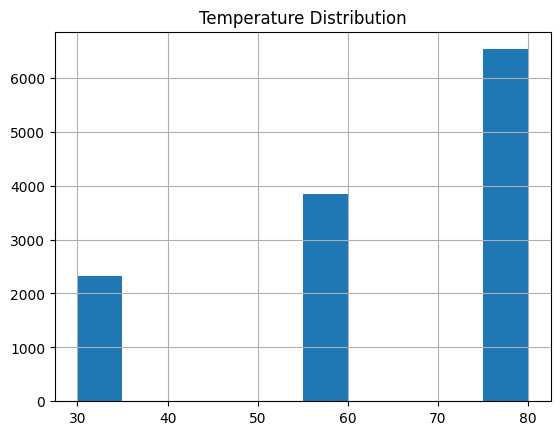

In [66]:
data.hist('temperature')
plt.title('Temperature Distribution')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [68]:
bar_df = data[data['coupon'] == 'Bar']
bar_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [69]:
bar_use_pct = bar_df['Y'].value_counts(normalize=True)
bar_use_pct

,proportion
Y,
0,0.589985
1,0.410015


Approx. 59% of bar coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [128]:
_3_or_less = ['never', 'less1', '1~3']
_4_or_more = ['4~8', 'gt8']

In [130]:
bar_df['bar_freq'] = np.where(bar_df['Bar'].isin(_3_or_less), 'less', np.where(bar_df['Bar'].isin(_4_or_more), 'more', 'other'))

<ipython-input-130-370f9677babf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['bar_freq'] = np.where(bar_df['Bar'].isin(_3_or_less), 'less', np.where(bar_df['Bar'].isin(_4_or_more), 'more', 'other'))


In [131]:
bar_df.groupby('bar_freq')['Y'].value_counts(normalize=True)

bar_freq  Y
less      0    0.629263
          1    0.370737
more      1    0.768844
          0    0.231156
Name: proportion, dtype: float64

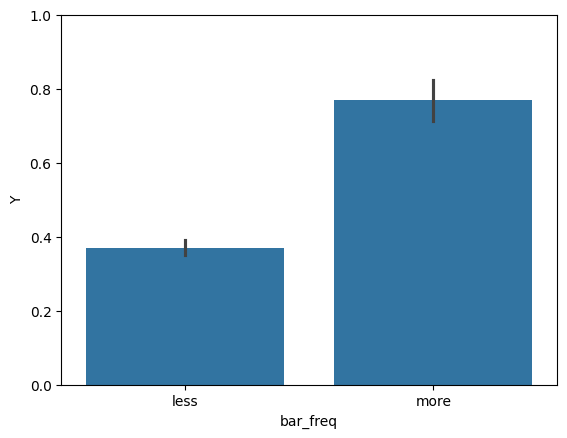

In [132]:
sns.barplot(data=bar_df, x='bar_freq', y='Y')
plt.ylim(0,1)
plt.show()

As expected, those that go 4 or more times in a month accepted far more often than those who go less.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [143]:
frequent_bar = ['1~3', '4~8', 'gt8']

over_25 = lambda x: x in ['26', '31', '36', '41', '50plus', '>50']

bar_df['frequent_over_25'] = np.where((bar_df['Bar'].isin(frequent_bar)) & (bar_df['age'].apply(over_25)), 1, 0)

<ipython-input-143-49dadab6ec2e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['frequent_over_25'] = np.where((bar_df['Bar'].isin(frequent_bar)) & (bar_df['age'].apply(over_25)), 1, 0)


In [85]:
bar_df.groupby('frequent_over_25')['Y'].value_counts(normalize=True)

frequent_over_25  Y
0                 0    0.664997
                  1    0.335003
1                 1    0.695238
                  0    0.304762
Name: proportion, dtype: float64

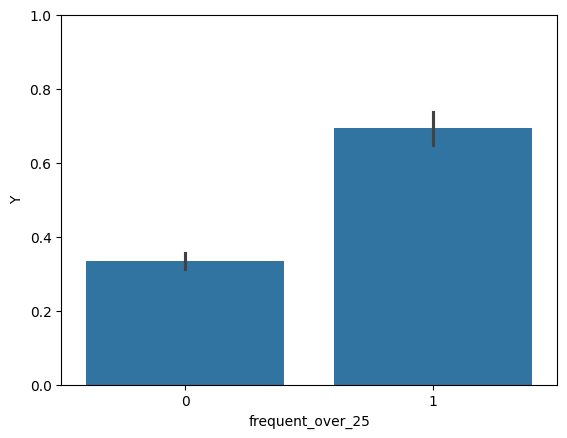

In [86]:
sns.barplot(data=bar_df, x='frequent_over_25', y='Y')
plt.ylim(0,1)
plt.show()

Frequent bar goers over 25 accept the coupon more often than others.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [93]:
adult_passengers = [p for p in bar_df['passanger'].unique() if p != 'Kid(s)']
adult_passengers

['Alone', 'Friend(s)', 'Partner']

In [94]:
farm_fish_forest = 'Farming Fishing & Forestry'

In [97]:
bar_df['no_kids_no_farm'] = np.where(
    (bar_df['Bar'].isin(frequent_bar)) &
    (bar_df['passanger'].isin(adult_passengers)) &
    (bar_df['occupation'] != farm_fish_forest), 1, 0
)

<ipython-input-97-b6a7711ea56e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['no_kids_no_farm'] = np.where(


In [98]:
bar_df.groupby('no_kids_no_farm')['Y'].value_counts(normalize=True)

no_kids_no_farm  Y
0                0    0.703956
                 1    0.296044
1                1    0.713249
                 0    0.286751
Name: proportion, dtype: float64

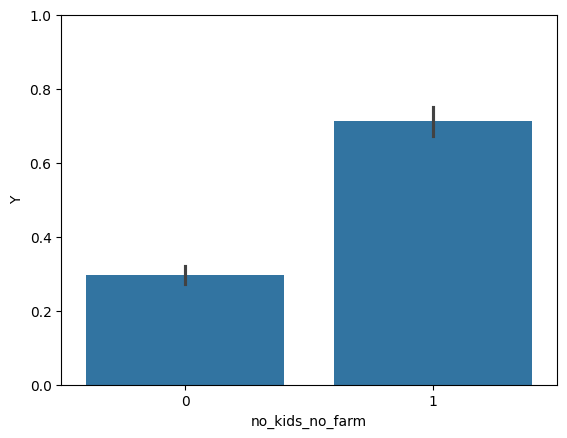

In [100]:
sns.barplot(data=bar_df, x='no_kids_no_farm', y='Y')
plt.ylim(0,1)
plt.show()

Those without kids having occupations other than Farming Fishing & Forestry had a significantly higher acceptance rate.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [124]:
not_widowed = [s for s in bar_df['maritalStatus'].unique() if s != 'Widowed']
under_30 = ['below21', '21', '26']
less_than_50k = ['less than $12500', '$12500 - 24999', '$25000 - $37499', '$37500 - $49999']

In [129]:
bar_df['con1'] = (bar_df['Bar'].isin(frequent_bar) &
       bar_df['passanger'].isin(adult_passengers) &
       bar_df['maritalStatus'].isin(not_widowed))

bar_df['con2'] = (bar_df['Bar'].isin(frequent_bar) &
       bar_df['age'].isin(under_30))

bar_df['con3'] = (bar_df['RestaurantLessThan20'].isin(_4_or_more) &
       bar_df['income'].isin(less_than_50k))

<ipython-input-129-4ecda5a639ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['con1'] = (bar_df['Bar'].isin(frequent_bar) &
<ipython-input-129-4ecda5a639ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['con2'] = (bar_df['Bar'].isin(frequent_bar) &
<ipython-input-129-4ecda5a639ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [111]:
bar_df['target_group'] = np.where(
    bar_df['con1'] | bar_df['con2'] | bar_df['con3'], 1, 0
)

<ipython-input-111-e883c2fbe94b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['target_group'] = np.where(


In [112]:
bar_df.groupby('target_group')['Y'].value_counts(normalize=True)

target_group  Y
0             0    0.702522
              1    0.297478
1             1    0.636771
              0    0.363229
Name: proportion, dtype: float64

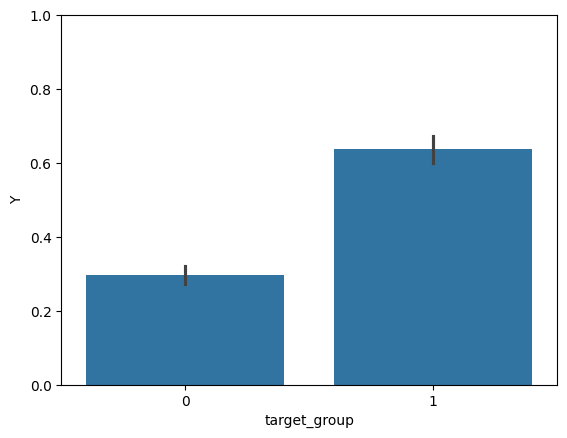

In [113]:
sns.barplot(data=bar_df, x='target_group', y='Y')
plt.ylim(0,1)
plt.show()

Looks like, as a whole, these groups do accept the coupon more often than others. Now I'd like to look at each individually.

In [114]:
bar_df.groupby('con1')['Y'].value_counts(normalize=True)

con1   Y
False  0    0.703956
       1    0.296044
True   1    0.713249
       0    0.286751
Name: proportion, dtype: float64

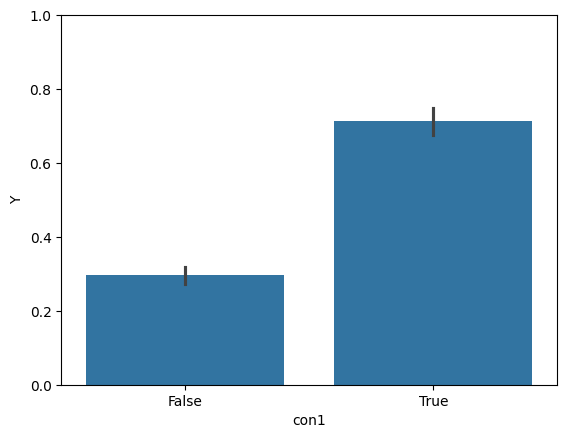

In [115]:
sns.barplot(data=bar_df, x='con1', y='Y')
plt.ylim(0,1)
plt.show()

So those who frequent bars, didn't have kids, and aren't widowed do accept more often.

In [116]:
bar_df.groupby('con2')['Y'].value_counts(normalize=True)

con2   Y
False  0    0.654306
       1    0.345694
True   1    0.721739
       0    0.278261
Name: proportion, dtype: float64

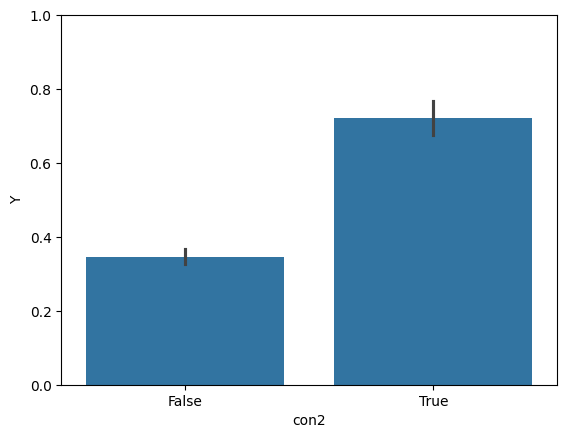

In [117]:
sns.barplot(data=bar_df, x='con2', y='Y')
plt.ylim(0,1)
plt.show()

Those who frequent bars and are under 30 also accept more often.

In [118]:
bar_df.groupby('con3')['Y'].value_counts(normalize=True)

con3   Y
False  0    0.595664
       1    0.404336
True   0    0.529070
       1    0.470930
Name: proportion, dtype: float64

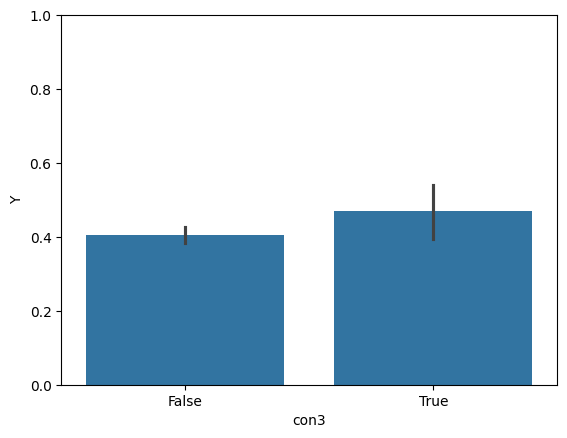

In [119]:
sns.barplot(data=bar_df, x='con3', y='Y')
plt.ylim(0,1)
plt.show()

Those who frequent cheap restaurants and make less than $50K do accept more often, but not to such an extent as the other groups.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who frequent bars were much more likely to accept the coupon, since they favored such locations already. Similarly, those without kids were more likely to accept, as they had immediate freedom to visit. There also seems to be a correlation between dining out at cheaper restaurants and the willingness to visit a bar.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I'd like to look at coffee shop coupon acceptance for this.

In [121]:
coffee_df = data[data['coupon'] == 'Coffee House']
coffee_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


Let's start by looking at those who visit coffee shops 3 or fewer times a month vs those who visit more.

In [133]:
coffee_df['coffee_freq'] = np.where(coffee_df['CoffeeHouse'].isin(_3_or_less), 'less',
                                    np.where(coffee_df['CoffeeHouse'].isin(_4_or_more), 'more', 'other'))

<ipython-input-133-3b690ee2dce0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_df['coffee_freq'] = np.where(coffee_df['CoffeeHouse'].isin(_3_or_less), 'less',


In [134]:
coffee_df.groupby('coffee_freq')['Y'].value_counts(normalize=True)

coffee_freq  Y
less         0    0.550385
             1    0.449615
more         1    0.675000
             0    0.325000
Name: proportion, dtype: float64

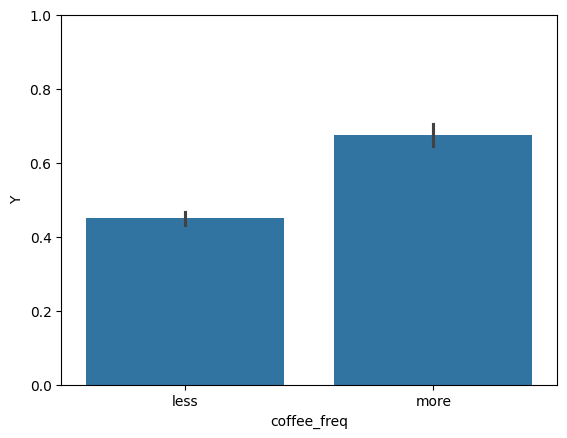

In [135]:
sns.barplot(data=coffee_df, x='coffee_freq', y='Y')
plt.ylim(0,1)
plt.show()

As expected, those who already frequent coffee shops are more likely to accept the coupon.

Now, let's look to see if time of day is a factor.

In [136]:
coffee_df['time'].unique()

array(['10AM', '2PM', '6PM', '7AM', '10PM'], dtype=object)

In [137]:
coffee_df.groupby('time')['Y'].value_counts(normalize=True)

time  Y
10AM  1    0.640712
      0    0.359288
10PM  0    0.575758
      1    0.424242
2PM   1    0.547859
      0    0.452141
6PM   0    0.587374
      1    0.412626
7AM   0    0.554217
      1    0.445783
Name: proportion, dtype: float64

Let's break it up by AM vs PM.

In [138]:
am = ['7AM', '10AM']
pm = ['2PM', '6PM', '10PM']

In [139]:
coffee_df['time_of_day'] = np.where(coffee_df['time'].isin(am), 'AM',
                                    np.where(coffee_df['time'].isin(pm), 'PM', 'other'))

<ipython-input-139-72bc0704f84c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_df['time_of_day'] = np.where(coffee_df['time'].isin(am), 'AM',


In [140]:
coffee_df.groupby('time_of_day')['Y'].value_counts(normalize=True)

time_of_day  Y
AM           1    0.542494
             0    0.457506
PM           0    0.536630
             1    0.463370
Name: proportion, dtype: float64

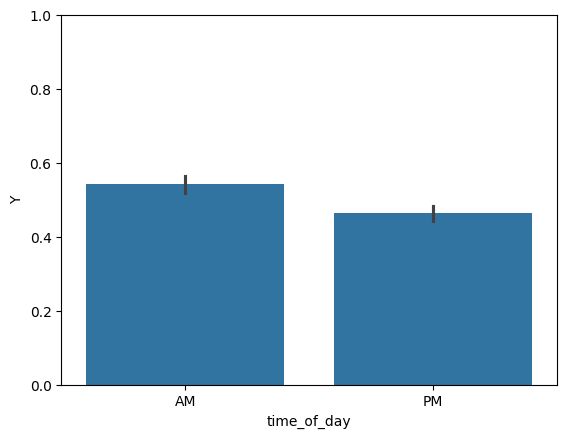

In [141]:
sns.barplot(data=coffee_df, x='time_of_day', y='Y')
plt.ylim(0,1)
plt.show()

Seems like time of day is a factor, but not as significant as expected.

Let's look at age groups and income next.

In [144]:
coffee_df.groupby('age')['Y'].value_counts(normalize=True)

age      Y
21       1    0.524349
         0    0.475651
26       1    0.514828
         0    0.485172
31       0    0.523274
         1    0.476726
36       0    0.532338
         1    0.467662
41       1    0.501538
         0    0.498462
46       1    0.513636
         0    0.486364
50plus   0    0.579817
         1    0.420183
below21  1    0.696774
         0    0.303226
Name: proportion, dtype: float64

In [145]:
coffee_df.groupby('income')['Y'].value_counts(normalize=True)

income            Y
$100000 or More   0    0.505618
                  1    0.494382
$12500 - $24999   1    0.540404
                  0    0.459596
$25000 - $37499   0    0.526563
                  1    0.473438
$37500 - $49999   1    0.542373
                  0    0.457627
$50000 - $62499   1    0.503650
                  0    0.496350
$62500 - $74999   0    0.563636
                  1    0.436364
$75000 - $87499   0    0.703390
                  1    0.296610
$87500 - $99999   1    0.557196
                  0    0.442804
Less than $12500  1    0.551948
                  0    0.448052
Name: proportion, dtype: float64

Let's take a look at occcupation next. For example, maybe students consume more coffee than others and are more likely to accept.

In [170]:
coffee_df['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [171]:
coffee_df.groupby('occupation')['Y'].value_counts(normalize=True)

occupation                                 Y
Architecture & Engineering                 1    0.555556
                                           0    0.444444
Arts Design Entertainment Sports & Media   1    0.507177
                                           0    0.492823
Building & Grounds Cleaning & Maintenance  1    0.727273
                                           0    0.272727
Business & Financial                       0    0.520548
                                           1    0.479452
Community & Social Services                0    0.648649
                                           1    0.351351
Computer & Mathematical                    1    0.503341
                                           0    0.496659
Construction & Extraction                  0    0.521739
                                           1    0.478261
Education&Training&Library                 0    0.564189
                                           1    0.435811
Farming Fishing & Forestry                 1    0.545455
                                           0    0.454545
Food Preparation & Serving Related         0    0.554217
                                           1    0.445783
Healthcare Practitioners & Technical       1    0.743243
                                           0    0.256757
Healthcare Support                         1    0.615385
                                           0    0.384615
Installation Maintenance & Repair          1    0.568182
                                           0    0.431818
Legal                                      0    0.623188
                                           1    0.376812
Life Physical Social Science               0    0.524590
                                           1    0.475410
Management                                 0    0.543624
                                           1    0.456376
Office & Administrative Support            0    0.568528
                                           1    0.431472
Personal Care & Service                    0    0.500000
                                           1    0.500000
Production Occupations                     0    0.642857
                                           1    0.357143
Protective Service                         0    0.551724
                                           1    0.448276
Retired                                    0    0.597561
                                           1    0.402439
Sales & Related                            0    0.608451
                                           1    0.391549
Student                                    1    0.625251
                                           0    0.374749
Transportation & Material Moving           1    0.618421
                                           0    0.381579
Unemployed                                 1    0.542105
                                           0    0.457895
Name: proportion, dtype: float64

<ipython-input-177-0cebdd96f550>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  by_job.set_xticklabels(by_job.get_xticklabels(), rotation=45, ha='right')


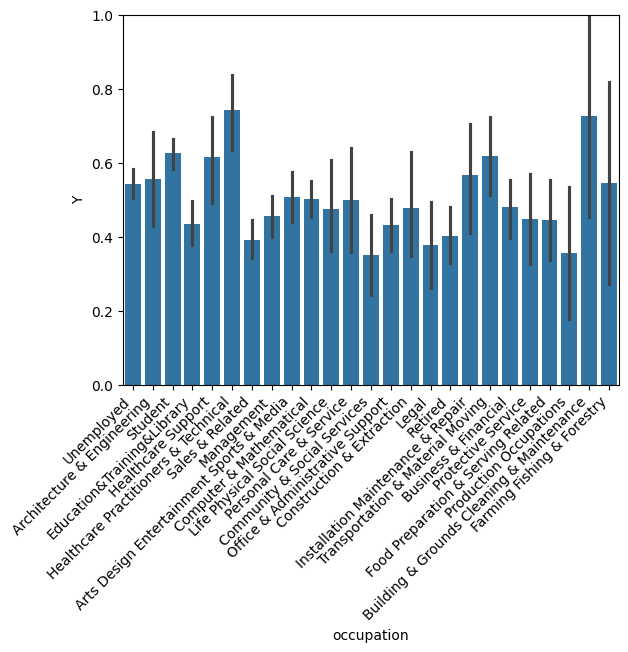

In [177]:
by_job = sns.barplot(data=coffee_df, x='occupation', y='Y')
by_job.set_xticklabels(by_job.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0,1)
plt.show()

While students do appear to accept more often than others, there are other occupations I hadn't considered that accept far more often (e.g., healthcare professionals and maintenance). Let's look at those three.

In [178]:
student_health_maint = coffee_df[coffee_df['occupation'].isin(['Student', 'Healthcare Practitioners & Technical', 'Building & Grounds Cleaning & Maintenance'])].copy()

<ipython-input-179-04c27e114943>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  three_jobs.set_xticklabels(three_jobs.get_xticklabels(), rotation=45, ha='right')


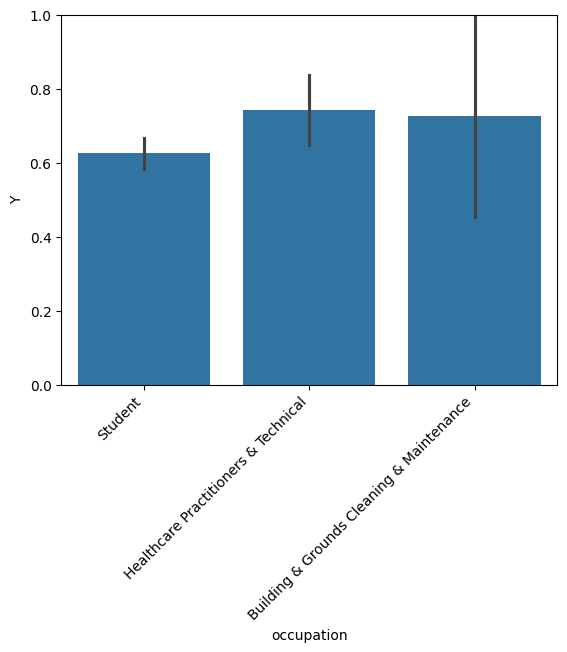

In [179]:
three_jobs = sns.barplot(data=student_health_maint, x='occupation', y='Y')
three_jobs.set_xticklabels(three_jobs.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0,1)
plt.show()

How about those traveling with different passengers?

In [167]:
coffee_df.groupby('passanger')['Y'].value_counts(normalize=True)

passanger  Y
Alone      0    0.562057
           1    0.437943
Friend(s)  1    0.596906
           0    0.403094
Kid(s)     0    0.516908
           1    0.483092
Partner    1    0.570492
           0    0.429508
Name: proportion, dtype: float64

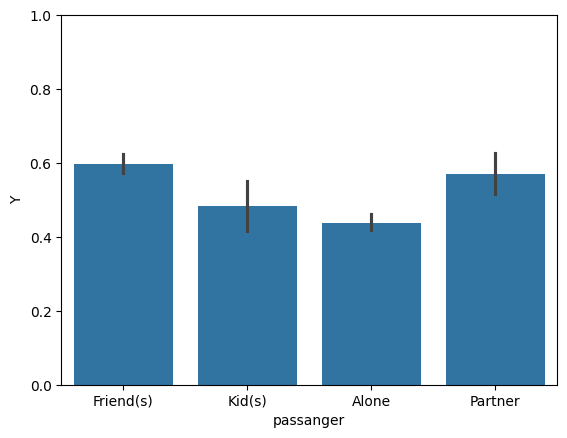

In [168]:
sns.barplot(data=coffee_df, x='passanger', y='Y')
plt.ylim(0,1)
plt.show()

It looks like those with friends are in fact the most likely to accept, though those with a partner are also likely.

In [182]:
coffee_df['with_friends'] = np.where(
    coffee_df['passanger'] == 'Friend(s)', 1, 0)

<ipython-input-182-a44e030cc1e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_df['with_friends'] = np.where(


In [183]:
coffee_df.groupby('with_friends')['Y'].value_counts(normalize=True)

with_friends  Y
0             0    0.544075
              1    0.455925
1             1    0.596906
              0    0.403094
Name: proportion, dtype: float64

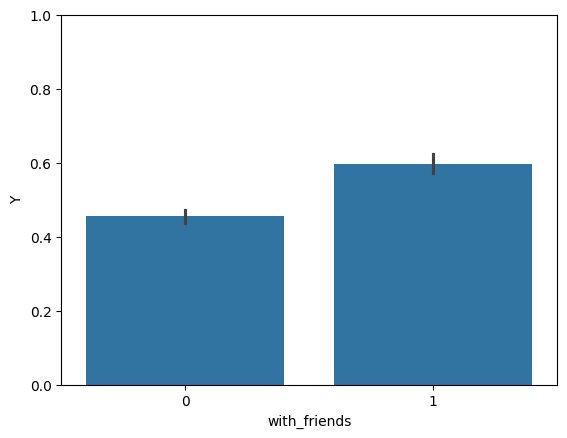

In [184]:
sns.barplot(data=coffee_df, x='with_friends', y='Y')
plt.ylim(0,1)
plt.show()

Those out with their friends are more likely to accept the coupon.

From what we've observed, those that frequent coffee shops are more likely to accept, as expected. Similarly, more people accept in the mornings, as we might expect people are in need of a caffeine source before work/school. It also appears students and healthcare workers consistently accept the coupon, as do those out with friends.